In [39]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Import tqdm for progress bar
from tqdm import tqdm

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
#mpl.rcParams['figure.dpi']=200 # dots per inch

# TensorFlow and tf.keras
import tensorflow as tf
import keras
import keras.layers as layers

from GHCND import *

In [ ]:
station = 'GM000010147'

ghn = GHCND()
ghn.readCountriesFile()
ghn.readStationsFile()

# Get list of station names
station_names = ghn.getStatKeyNames()

# get url for a given station index
fileName = f"{station}.dly"
urlName = f"http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/ghcnd/ghcnd_gsn/{fileName}"

# copy station data from remote to local
destination = f"data/{fileName}"
urllib.request.urlretrieve(urlName, destination)
station_data = ghn.processFile(destination)
print(ghn.getStation(station))

In [ ]:
t_max = Variable(ghn.getVar(station_data, 'TMAX'), "max temp (degC)", ghn.stationDict[station].name)
vals = t_max.get_vals()
dates = t_max.get_dates()

# plot first year of observations
fig, ax = plt.subplots()
ax.plot(vals[:365])

In [ ]:
means = np.array(t_max.get_monthly_means())
means = t_max.normalise(means)
print(len(means))
print(means[:9])


In [ ]:
fig, ax = plt.subplots()
ax.plot(means[:36])

In [ ]:
test_data = np.linspace(0, 99, 100)
print(test_data)
len(test_data)

In [ ]:
def make_timeseqs(series,n_ts,offset):
    """
    Converts a series with data values into a dataframe of N-ts values with a target offset
    samples later.
    """
    nn_df = pd.DataFrame()
    for i in range(n_ts):
        nn_df[i] = series.shift(n_ts-i) #Shift the data by n_ts-i samples
    nn_df['label'] = series.shift(-offset)
    return nn_df

In [ ]:
df.Mean=df.Mean/df.Mean.max()
offset=0
n_ts=6 #Number of values in a time sequence
nn_df=make_timeseqs(df.Mean,n_ts,offset) #6 samples per row for training, offset of 0 (so next sample)
nn_df.head(8)

In [41]:
WINDOW_SIZE = 5
OFFSET = 1

train_len = int(len(test_data) * 0.7)
validate_len = int(len(test_data) * 0.1)
test_len = int(len(test_data) * 0.2)

input_train, target_train = shapeArray(test_data[test_len:test_len+train_len], WINDOW_SIZE, OFFSET)
input_validate, target_validate = shapeArray(test_data[test_len+train_len+1:], WINDOW_SIZE, OFFSET)
input_test, target_test = shapeArray(test_data[:test_len], WINDOW_SIZE, OFFSET)


In [42]:
print(input_train)
print(target_train)

[[20. 21. 22. 23. 24.]
 [21. 22. 23. 24. 25.]
 [22. 23. 24. 25. 26.]
 [23. 24. 25. 26. 27.]
 [24. 25. 26. 27. 28.]
 [25. 26. 27. 28. 29.]
 [26. 27. 28. 29. 30.]
 [27. 28. 29. 30. 31.]
 [28. 29. 30. 31. 32.]
 [29. 30. 31. 32. 33.]
 [30. 31. 32. 33. 34.]
 [31. 32. 33. 34. 35.]
 [32. 33. 34. 35. 36.]
 [33. 34. 35. 36. 37.]
 [34. 35. 36. 37. 38.]
 [35. 36. 37. 38. 39.]
 [36. 37. 38. 39. 40.]
 [37. 38. 39. 40. 41.]
 [38. 39. 40. 41. 42.]
 [39. 40. 41. 42. 43.]
 [40. 41. 42. 43. 44.]
 [41. 42. 43. 44. 45.]
 [42. 43. 44. 45. 46.]
 [43. 44. 45. 46. 47.]
 [44. 45. 46. 47. 48.]
 [45. 46. 47. 48. 49.]
 [46. 47. 48. 49. 50.]
 [47. 48. 49. 50. 51.]
 [48. 49. 50. 51. 52.]
 [49. 50. 51. 52. 53.]
 [50. 51. 52. 53. 54.]
 [51. 52. 53. 54. 55.]
 [52. 53. 54. 55. 56.]
 [53. 54. 55. 56. 57.]
 [54. 55. 56. 57. 58.]
 [55. 56. 57. 58. 59.]
 [56. 57. 58. 59. 60.]
 [57. 58. 59. 60. 61.]
 [58. 59. 60. 61. 62.]
 [59. 60. 61. 62. 63.]
 [60. 61. 62. 63. 64.]
 [61. 62. 63. 64. 65.]
 [62. 63. 64. 65. 66.]
 [63. 64. 6

In [46]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
input_train = input_train.reshape((input_train.shape[0], input_train.shape[1], n_features))
input_test = input_test.reshape((input_test.shape[0], input_test.shape[1], n_features))
input_validate = input_validate.reshape((input_validate.shape[0], input_validate.shape[1], n_features))
print(input_train[0])
print(input_test[0])
print(input_validate[0])

[[20.]
 [21.]
 [22.]
 [23.]
 [24.]]
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]]
[[91.]
 [92.]
 [93.]
 [94.]
 [95.]]


In [47]:
print(target_train)

[25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42.
 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.
 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78.
 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 4)                 96        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
3/3 [==============================] - 1s 4ms/step - loss: 3600.4106 - accuracy: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 3596.9956 - accuracy: 0.0000e+00
Epoch 3/200
3/3 [==============================] - 0s 5ms/step - loss: 3593.5496 - accuracy: 0.0000e+00
Epoch 4/200
3/3 [==============================] - 0s 5ms/step - loss: 3590.1079 - accuracy: 0.0000e+00
Epoch 5/200
3/3 [==================

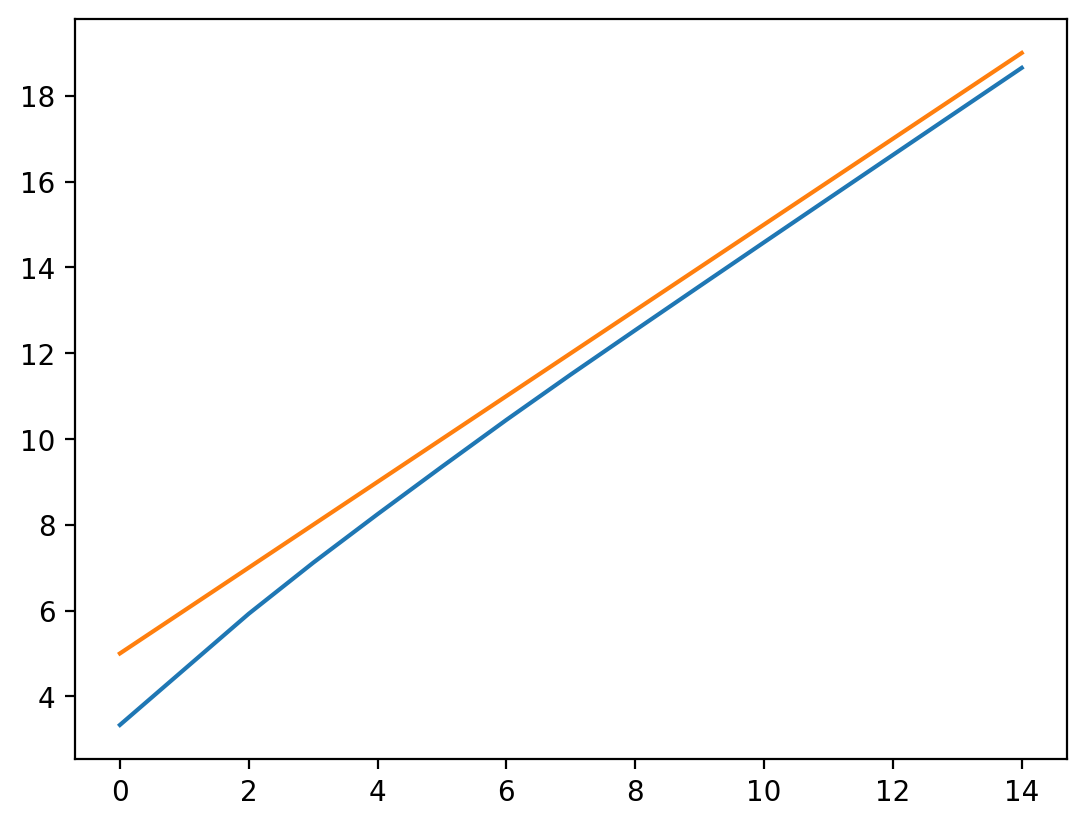

In [53]:
model = keras.models.Sequential()
model.add(layers.LSTM(4, input_shape=(WINDOW_SIZE, 1), activation = 'relu'))
model.add(layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

model.summary()

history = model.fit(input_train, target_train, epochs = 200, verbose = 1) #, validation_data = (input_validate, target_validate))
cost = history.history['loss']

prediction = model.predict(input_test)

fig, ax = plt.subplots()
ax.plot(prediction)
ax.plot(target_test)

In [ ]:
fig, ax = plt.subplots()
ax.plot(prediction)

In [ ]:
print(input_test)
print(target_test)
print(prediction)

In [ ]:
#Define
model=keras.models.Sequential()
model.add(layers.LSTM(50,input_shape=(None,1),return_sequences=False)) # LSTM layer with 50 neurons
model.add(layers.Dense(1,activation="linear"))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

In [ ]:
def sinexp(x):
    return np.sin(x)

numPoints = 100
x = np.linspace(0, 10*np.pi, numPoints)
y = sinexp(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel("x")
ax.set_xlabel("y")
ax.set_title("Target Function")
ax.legend()

In [ ]:
windowsize = 10 # number of samples we will use to train our network
offset = 10 # how many samples into the future to predict


def shape_array(x, windowsize, offset):
    """
    Splits up a 1-d array x into a series of overlapping windows.
    
    Params:
        x: the 1-d array to split
        windowSize: the number of samples used to train the network
        offset: the number of samples into the future to predict
        
    Returns:
        xInput, xLabel: a tuple of the array of input windows and target (label) windows
    """
    xInput = np.array([x[i : i + windowsize] for i in range(len(x) - (windowsize + offset) + 1)])
    xLabel = np.array([x[i + windowsize : i + windowsize + offset] for i in range(len(x) - (windowsize + offset) + 1)])
    return (xInput, xLabel)



samp = np.arange(numPoints)  #Number of samples
sampInput,sampLabel = shape_array(samp, windowsize, offset)
for i in range(5):
    print(i, sampInput[i], sampLabel[i])
    

#Get our xInput and xLabel arrays    
xInput, xLabel = shape_array(x, windowsize, offset)
#for i in range(5):
#    print(i,xInput[i],xLabel[i])

# get our yInput and yLabel arrays
yInput = sinexp(xInput)
yLabel = sinexp(xLabel)

# show the shape of the arrays
print(yInput.shape)
print(yLabel.shape)
print(yLabel)

In [ ]:
steps = 200  # number of training steps
costs = np.zeros(steps)  # array for plotting cost

for i in tqdm(range(steps)):
    x0 = 0 #np.random.uniform(low=0,high=5)  #Pick random start point between 0 and 5
    x = np.linspace(x0, x0+10*np.pi, numPoints) #generate numPoints points from that  posiiton
    xInput, xLabel = shape_array(x, windowsize , offset)  #Split that into the input and label arrays

    yInput=sinexp(xInput)  # Apply the sinexp function to xInput
    yLabel=sinexp(xLabel)  # Apply the sinexp function to xLabel
    # Now we need to reshape the array into batchsize * window size * features (1)
    y_in = yInput.reshape(yInput.shape[0], yInput.shape[1], 1)  # Reshape the input array to have the dimensions (batchsize,time samples, features)
    print(np.shape(y_in))
    print(y_in)
    # We only want a single number for the target (since we set return_sequences=False above). We will take the last sample of the yLabel
    y_target = yLabel[:,-1].reshape(yLabel.shape[0], 1) # Reshape the output array to have the dimensions (batchsize, time samples)
    costs[i] = model.train_on_batch(y_in, y_target) #Train the network

#Plot costs vs steps
fig, ax = plt.subplots()
ax.plot(np.arange(steps), costs, label = r"Costs")
ax.set_xlabel("Steps")
ax.set_ylabel("Cost")
ax.set_title("Network Training Cost")
ax.legend()